In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk 
import numpy as np

In [2]:
features = ['datetime',
            'latitude',
            'longitude',
            'absoluteAltitude',
            'magneticHeading',
            'trueHeading',
            'groundSpeed',
            'trueAirspeed',
            'pitch',
            'roll',
            'yaw',
            'angleOfAttack',
            'flightPathAngle',
            'verticalFlightPathAngle',
            'horizontalFlightPathAngle',
            'rollAcceleration',
            'pitchAcceleration',
            'yawAcceleration',
            'e1N1ng',
            'e2N1ng',
            'e1N2nf',
            'e2N2nf',
            'mainRotorRpm',
            'tailRotorRpm',
            'mainRotorTorque',
            'e1Itt',
            'e2Itt',
            'mainRotorInducedInflow',
            'flightDirectorPitch',
            'flightDirectorRoll',
            'climbOrDescentRate',
            'hasWeightOnWheels',
            'turnRate to degPerSec',
            'cyclicPositionPitch',
            'cyclicPositionRoll',
            'collectivePosition',
            'antiTorquePedalPosition',
            'throttlePosition',
            'e1Torque',
            'e2Torque'
]

def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output  

In [3]:
# reading files from 10/20 dataset
df8 = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df8 = df_transformation(df8)


<ipython-input-2-153586f0628e>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [4]:
#normalize values 
df8_norm = df8.loc[:, df8.columns != 'datetime']
df8_norm = (df8_norm-df8_norm.min())/(df8_norm.max()-df8_norm.min())
df8_norm.insert(1, 'datetime', df8[['datetime']])

In [5]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df8['Hover_Taxi'] = 0
df8['Quick_Stop'] = 0

In [6]:
#Add columns for surface and hover taxi maneuvers and set default value to zero
df8_norm['Hover_Taxi'] = 0
df8_norm['Quick_Stop'] = 0

In [7]:
#label data points
df8.loc[(df8['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 80
df8.loc[(df8['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['Hover_Taxi']] = 40
df8.loc[(df8['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['Hover_Taxi']] = 40
df8.loc[(df8['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['Hover_Taxi']] = 40
df8.loc[(df8['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['Hover_Taxi']] = 40



In [8]:
#label data points (with normalized data)
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:23:30' , '2022-10-20 21:23:54' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:24:55' , '2022-10-20 21:25:20' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:26:20' , '2022-10-20 21:26:46' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:27:47' , '2022-10-20 21:28:05' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:29:33' , '2022-10-20 21:29:56' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:30:50' , '2022-10-20 21:31:12' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:32:20' , '2022-10-20 21:32:40' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:33:55' , '2022-10-20 21:34:18' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:35:20' , '2022-10-20 21:35:45' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:36:45' , '2022-10-20 21:37:11' , inclusive='both')),['Quick_Stop']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['Hover_Taxi']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['Hover_Taxi']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['Hover_Taxi']] = 1
df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['Hover_Taxi']] = 1



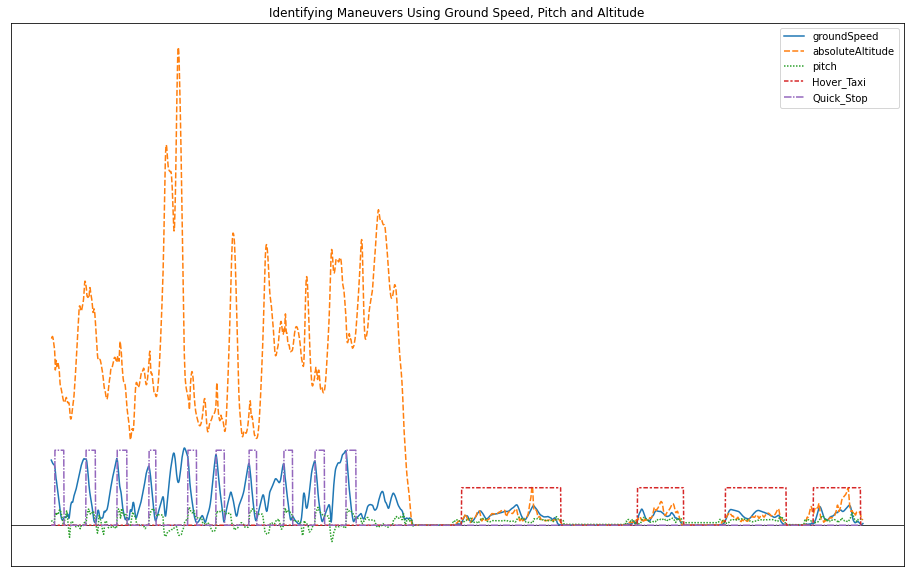

In [9]:
#Plot Ground Speed and altitude over time - during period with flight logs
df8_groundspd_alt = df8.loc[(df8['datetime'].between('2022-10-20 21:23:20' , '2022-10-20 22:00:15', inclusive='both')),['datetime', 'groundSpeed', 'absoluteAltitude', 'pitch', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df8_groundspd_alt).set(title = 'Identifying Maneuvers Using Ground Speed, Pitch and Altitude')

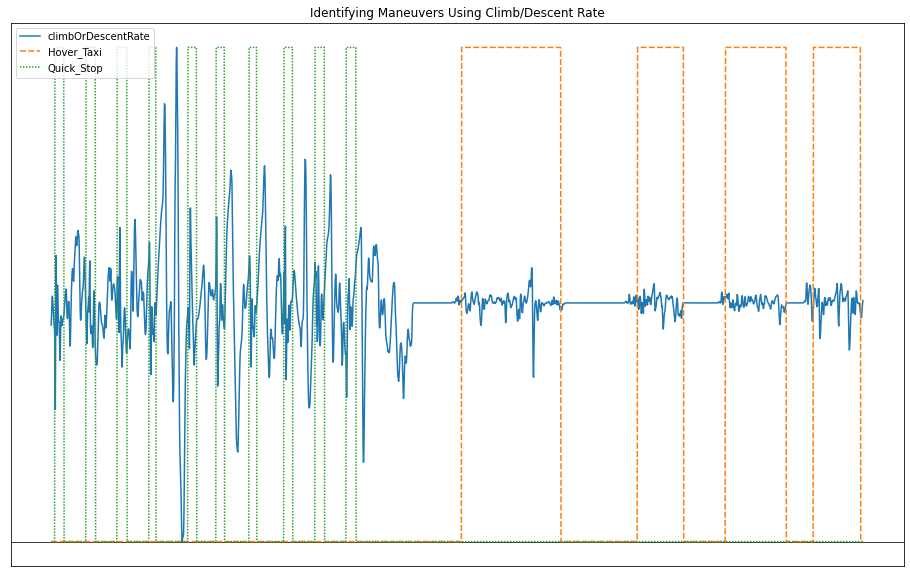

In [10]:
#Plot climb/descent rate over time
df8_climb_desc = df8_norm.loc[(df8_norm['datetime'].between('2022-10-20 21:23:20' , '2022-10-20 22:00:15' , inclusive='both')),['datetime', 'climbOrDescentRate', 'Hover_Taxi', 'Quick_Stop']]
plt.figure(figsize=(16, 10))
plt.axhline(0, c = 'black', lw = 0.75)
plt.xticks([])
plt.yticks([])
p = sns.lineplot(data = df8_climb_desc).set(title = 'Identifying Maneuvers Using Climb/Descent Rate')